In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [5]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [14]:
df["CHAS"].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

### 1. Difference in Median Values based on Charles River Bounding

Use student t-test to compare the median values of houses bounded by the Charles River

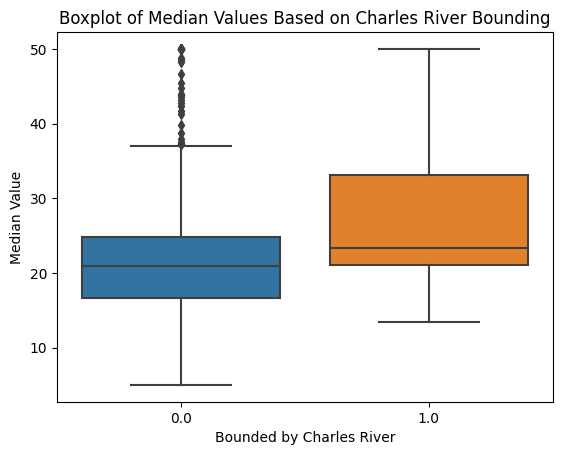

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

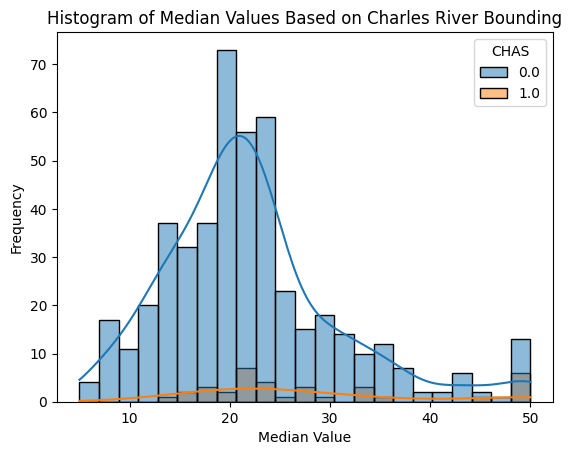

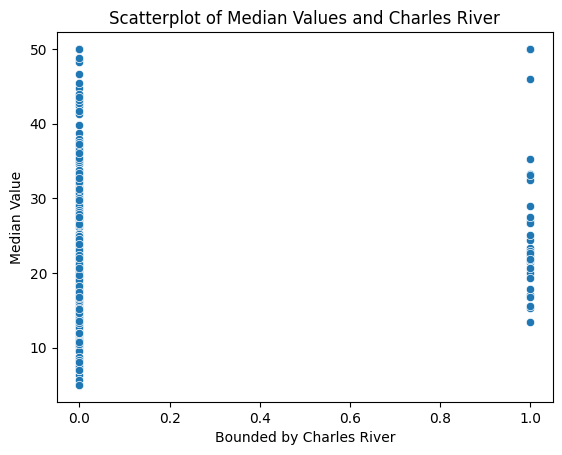

In [9]:
# Boxplot
sns.boxplot(x='CHAS', y='MEDV', data=df)
plt.title('Boxplot of Median Values Based on Charles River Bounding')
plt.xlabel('Bounded by Charles River')
plt.ylabel('Median Value')
plt.show()

# Histogram
sns.histplot(data=df, x='MEDV', hue='CHAS', kde=True)
plt.title('Histogram of Median Values Based on Charles River Bounding')
plt.xlabel('Median Value')
plt.ylabel('Frequency')
plt.show()

# Scatterplot
sns.scatterplot(x='CHAS', y='MEDV', data=df)
plt.title('Scatterplot of Median Values and Charles River')
plt.xlabel('Bounded by Charles River')
plt.ylabel('Median Value')
plt.show()

In [22]:
# Subset the data for houses bounded and not bounded by the Charles River
bounded = df[df['CHAS'] == 1]['MEDV']
not_bounded = df[df['CHAS'] == 0]['MEDV']

# Perform t-test
t_stat, p_value = stats.ttest_ind(bounded, not_bounded)

# Print results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Check significance level
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in median values bounded by the Charles River.")
else:
    print("There is no significant difference in median values bounded by the Charles River.")

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
There is a significant difference in median values bounded by the Charles River.


### 2. Is there significant difference in the median values of house of each proportion of owner occupied units built before 1940

We can use analysis of variance (ANOVA) since we are comparing more than two groups.

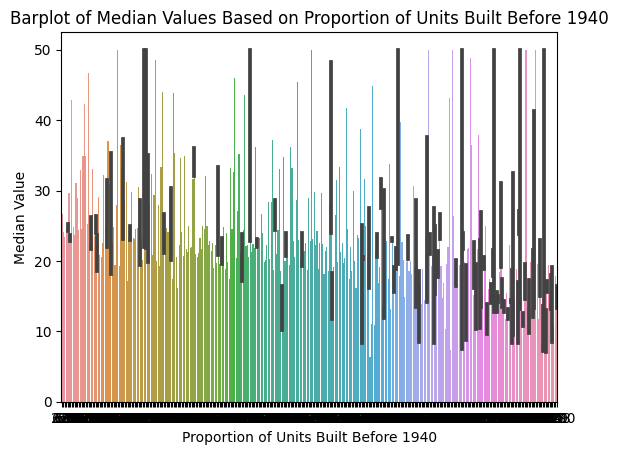

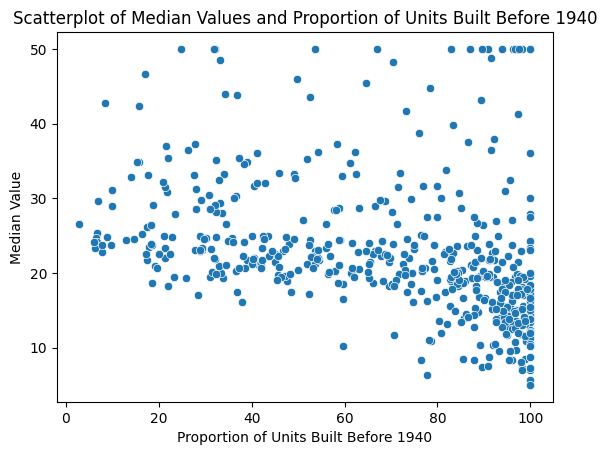

In [19]:
# Barplot
sns.barplot(x='AGE', y='MEDV', data=df, estimator=np.median)
plt.title('Barplot of Median Values Based on Proportion of Units Built Before 1940')
plt.xlabel('Proportion of Units Built Before 1940')
plt.ylabel('Median Value')
plt.show()

# Scatterplot
sns.scatterplot(x='AGE', y='MEDV', data=df)
plt.title('Scatterplot of Median Values and Proportion of Units Built Before 1940')
plt.xlabel('Proportion of Units Built Before 1940')
plt.ylabel('Median Value')
plt.show()

In [23]:
# Unique values of proportion of owner-occupied units built before 1940
unique_proportions = df['AGE'].unique()

# List to store the median values for each group
median_values = []

# Loop through each unique proportion value
for proportion in unique_proportions:
    # Subset the data for houses with the current proportion
    subset = df[df['AGE'] == proportion]['MEDV']
    # Calculate the median value for the subset
    median = np.median(subset)
    # Append the median value to the list
    median_values.append(median)

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*[df[df['AGE'] == proportion]['MEDV'] for proportion in unique_proportions])

# Print results
print("F-statistic:", f_stat)
print("P-value:", p_value)

# Check significance level
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in median values based on proportions of owner-occupied units built before 1940.")
else:
    print("There is no significant difference in median values based on proportions of owner-occupied units built before 1940.")

F-statistic: 0.9840091646131573
P-value: 0.5539698276810093
There is no significant difference in median values based on proportions of owner-occupied units built before 1940.


### 3. Can we conclude there is no relationship between nitric oxide concentrations and proportion of non retail business acres per town

We can use Pearson's correlation coefficient, which measures the strength and direction of a linear relationship between two continuous variables.

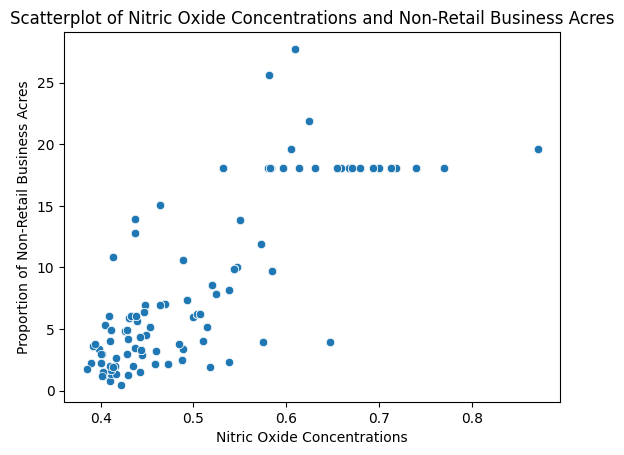

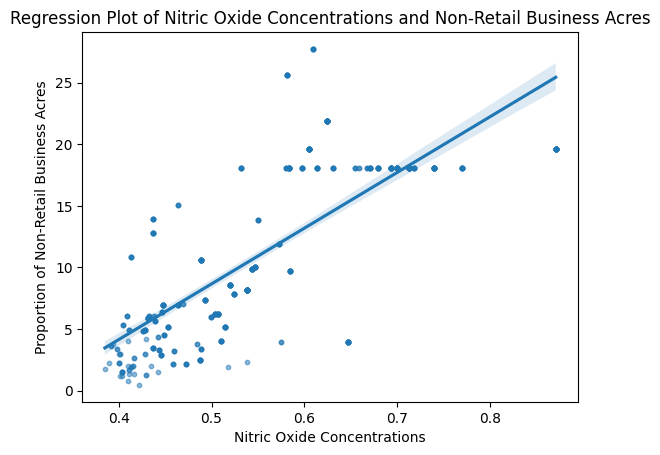

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


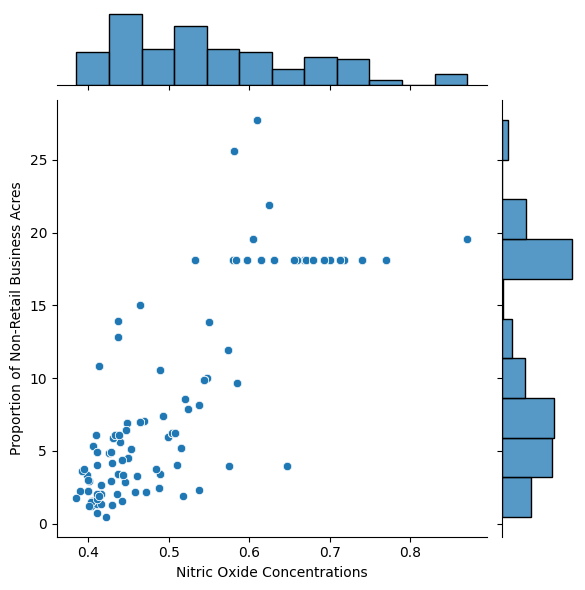

In [24]:
# Scatterplot
sns.scatterplot(x='NOX', y='INDUS', data=df)
plt.title('Scatterplot of Nitric Oxide Concentrations and Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()

# Regression plot
sns.regplot(x='NOX', y='INDUS', data=df, scatter_kws={"s": 10, "alpha": 0.5})
plt.title('Regression Plot of Nitric Oxide Concentrations and Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()

# Jointplot
sns.jointplot(x='NOX', y='INDUS', data=df, kind='scatter')
plt.xlabel('Nitric Oxide Concentrations')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()

In [25]:
corr, p_value = stats.pearsonr(df['NOX'], df['INDUS'])

# Print results
print("Pearson correlation coefficient:", corr)
print("P-value:", p_value)

# Check significance level
alpha = 0.05
if p_value < alpha:
    print("There is a significant relationship between nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("There is no significant relationship between nitric oxide concentrations and proportion of non-retail business acres per town.")

Pearson correlation coefficient: 0.7636514469209151
P-value: 7.913361061239527e-98
There is a significant relationship between nitric oxide concentrations and proportion of non-retail business acres per town.


### 4. What is the impact of an additional weighted distance to the five Boston’s employment centres of the median value of owner occupied homes 

We can use linear regression

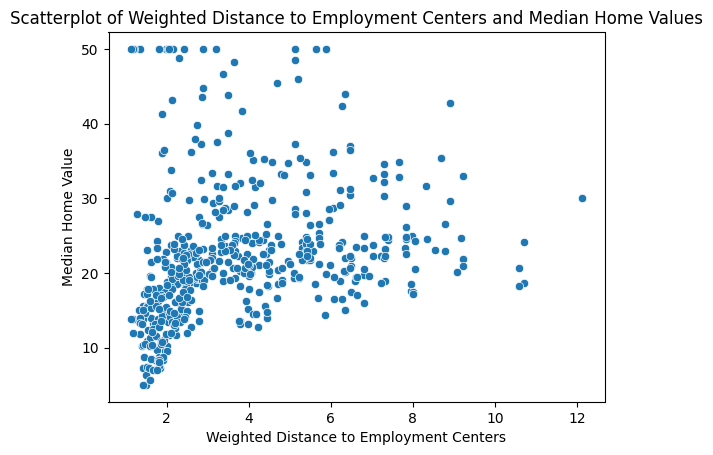

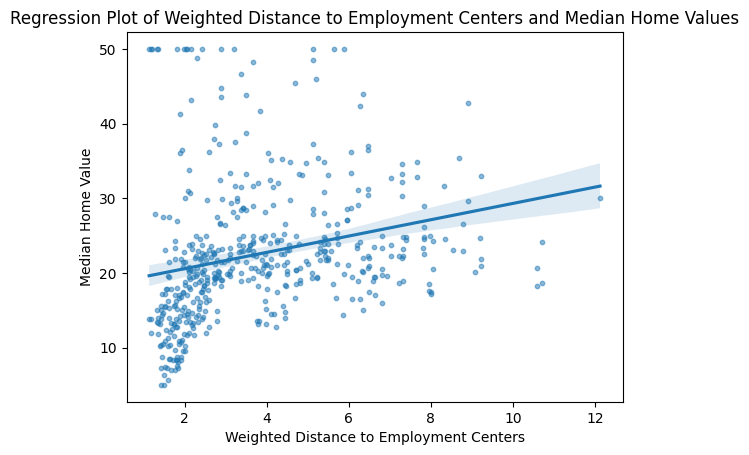

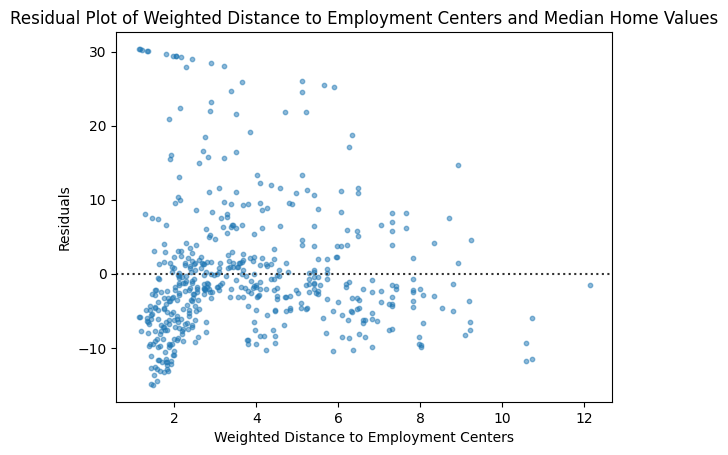

In [26]:
# Scatterplot
sns.scatterplot(x='DIS', y='MEDV', data=df)
plt.title('Scatterplot of Weighted Distance to Employment Centers and Median Home Values')
plt.xlabel('Weighted Distance to Employment Centers')
plt.ylabel('Median Home Value')
plt.show()

# Regression plot
sns.regplot(x='DIS', y='MEDV', data=df, scatter_kws={"s": 10, "alpha": 0.5})
plt.title('Regression Plot of Weighted Distance to Employment Centers and Median Home Values')
plt.xlabel('Weighted Distance to Employment Centers')
plt.ylabel('Median Home Value')
plt.show()

# Residual plot
sns.residplot(x='DIS', y='MEDV', data=df, scatter_kws={"s": 10, "alpha": 0.5})
plt.title('Residual Plot of Weighted Distance to Employment Centers and Median Home Values')
plt.xlabel('Weighted Distance to Employment Centers')
plt.ylabel('Residuals')
plt.show()

In [29]:
# Prepare the data
X = df['DIS']  # Weighted distances to employment centers
y = df['MEDV']  # Median value of owner-occupied homes

# Add a constant term to the predictor
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 12 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        13:24:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [30]:
# Extract the coefficient for the 'DIS' variable
impact = model.params['DIS']

# Print the impact
print("Impact of an additional weighted distance to employment centers:", impact)

Impact of an additional weighted distance to employment centers: 1.0916130158411075
